In [1]:
# dependencies
import keras
from keras.datasets import cifar10
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten,MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from datetime import datetime




In [2]:

# define num_class
num_classes = 10

# load dataset keras will download cifar-10 datset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# (Optional)Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


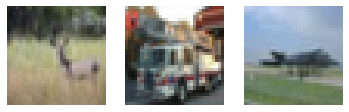

In [3]:
img_size = 32
plt.subplot(1, 3, 1)
plt.imshow(x_train[520].reshape(img_size, img_size,3))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(x_train[900].reshape(img_size, img_size,3))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(x_train[600].reshape(img_size, img_size,3))
plt.axis('off')

print(y_train[520])
print(y_train[900])
print(y_train[600])
x_train = x_train/255
x_test = x_test/255

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(lr = 0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:

# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])
# fit the model
tick = datetime.now()
baseline_model = model.fit(x_train,y_train,epochs=50,validation_split=0.2,batch_size = 128)
toc = datetime.now()
time_taken = toc-tick
print('Time taken for convergence in minutes: ',time_taken.total_seconds()/60)

Epoch 1/50
313/313 [==============================] - 355s 1s/step - loss: 1.6126 - accuracy: 0.4220 - val_loss: 1.9581 - val_accuracy: 0.3609
Epoch 2/50
313/313 [==============================] - 351s 1s/step - loss: 1.2009 - accuracy: 0.5677 - val_loss: 1.0252 - val_accuracy: 0.6316
Epoch 3/50
313/313 [==============================] - 351s 1s/step - loss: 1.0032 - accuracy: 0.6446 - val_loss: 0.8732 - val_accuracy: 0.6865
Epoch 4/50
313/313 [==============================] - 351s 1s/step - loss: 0.8757 - accuracy: 0.6914 - val_loss: 0.8211 - val_accuracy: 0.7106
Epoch 5/50
313/313 [==============================] - 350s 1s/step - loss: 0.7792 - accuracy: 0.7271 - val_loss: 0.7236 - val_accuracy: 0.7475
Epoch 6/50
313/313 [==============================] - 348s 1s/step - loss: 0.7056 - accuracy: 0.7510 - val_loss: 0.6789 - val_accuracy: 0.7628
Epoch 7/50
313/313 [==============================] - 353s 1s/step - loss: 0.6373 - accuracy: 0.7746 - val_loss: 0.6782 - val_accuracy: 0.7701

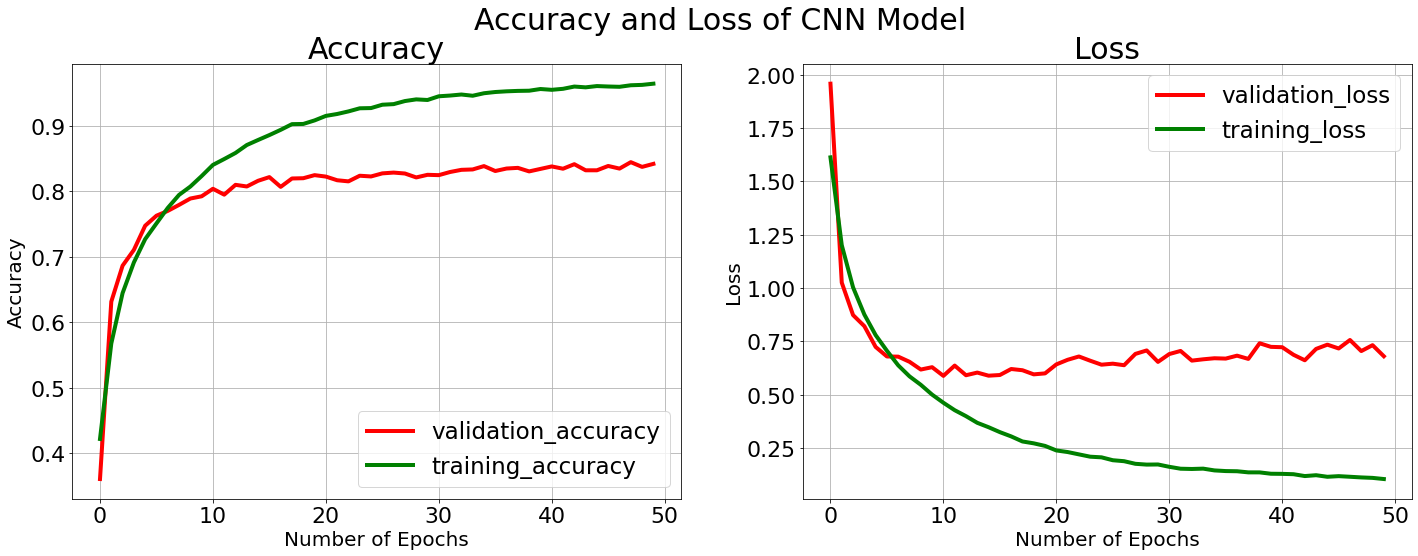

In [8]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.rcParams.update({'font.size': 22})
plt.plot(baseline_model.history["val_accuracy"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(baseline_model.history["accuracy"], label="training_accuracy", c="green", linewidth=4)
plt.legend(prop = {'size':23})
plt.xlabel("Number of Epochs",fontsize = 20)
plt.ylabel("Accuracy",fontsize = 20)
plt.title("Accuracy",fontdict = {'fontsize' : 30})
plt.grid(True)

plt.subplot(1,2,2)
plt.rcParams.update({'font.size': 22})
plt.plot(baseline_model.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(baseline_model.history["loss"], label="training_loss", c="green", linewidth=4)
plt.xlabel("Number of Epochs",fontsize = 20)
plt.ylabel("Loss",fontsize = 20)
plt.title("Loss",fontdict = {'fontsize' : 30})
plt.legend(prop = {'size':23})
plt.grid(True)

plt.suptitle("Accuracy and Loss of CNN Model",fontsize=30)

plt.show()

In [7]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 29s 92ms/step - loss: 0.7329 - accuracy: 0.8341


[0.7328892350196838, 0.8341000080108643]